In [22]:
# Load libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score as acs
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [23]:
data = pd.read_csv('Proj1ReorderedRound.csv')
X = data.drop(['Condition'], axis = 1)
Y = data['Condition']

X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

YClass = ['Condition3','Condtion4','Normal1']    #default target names. only useful in visualisation

In [24]:
k = 4

cv = sk(n_splits=k, shuffle=True, random_state=0)



Fold Group  1


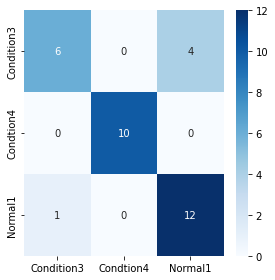

              precision    recall  f1-score   support

  Condition3       0.86      0.60      0.71        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.75      0.92      0.83        13

    accuracy                           0.85        33
   macro avg       0.87      0.84      0.84        33
weighted avg       0.86      0.85      0.84        33



Fold Group  2


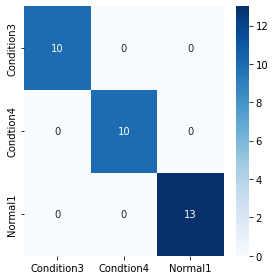

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        10
  Condition4       1.00      1.00      1.00        10
     Normal1       1.00      1.00      1.00        13

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



Fold Group  3


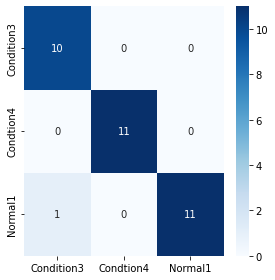

              precision    recall  f1-score   support

  Condition3       0.91      1.00      0.95        10
  Condition4       1.00      1.00      1.00        11
     Normal1       1.00      0.92      0.96        12

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



Fold Group  4


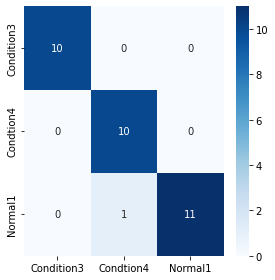

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        10
  Condition4       0.91      1.00      0.95        10
     Normal1       1.00      0.92      0.96        12

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



average C3 Accuracy =  0.9416
average C4 Accuracy =  0.9773
average N1 Accuracy =  0.9375
average Net Accuracy =  0.9467


In [28]:
model = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state=0, n_jobs=-1)
n = 1

#creating lists to store the calculated accuracies for each fold group, allowing the average to be calculated later

C3AL = []    # Condition3 Accuracy List
C4AL = []    # Condition4 Accuracy List
N1AL = []    # Normal1 Accuracy List

NAL = []    # Net Accuracy List

for trainIndex, testIndex in cv.split(X, Y):
    print('\n\nFold Group ', n)
    n += 1
    
    train_X = X.iloc[trainIndex]                 #train/test data allocation
    test_X = X.iloc[testIndex]
    train_Y = Y.iloc[trainIndex]
    test_Y = Y.iloc[testIndex]
    
    model.fit(train_X, train_Y.values.ravel())
    pred_Y = model.predict(test_X)
    
    CM = confusion_matrix(test_Y, pred_Y)        #confusion matrix
    
    fig, ax = plt.subplots(figsize=(4,4))        #CM visualisation
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)

    print(classification_report(test_Y,pred_Y))
    
    C3Acc = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
    C3AL.append(C3Acc)
    C4Acc = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
    C4AL.append(C4Acc)
    N1Acc = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
    N1AL.append(N1Acc)
    
    NetAcc = acs(test_Y,pred_Y)
    NAL.append(NetAcc)
    
print('\n')

print('average C3 Accuracy = ', np.mean(C3AL).round(4))
print('average C4 Accuracy = ' , np.mean(C4AL).round(4))
print('average N1 Accuracy = ', np.mean(N1AL).round(4))
print('average Net Accuracy = ', np.mean(NAL).round(4))



Fold Group  1


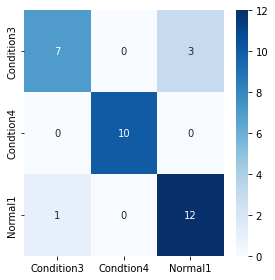

              precision    recall  f1-score   support

  Condition3       0.88      0.70      0.78        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.80      0.92      0.86        13

    accuracy                           0.88        33
   macro avg       0.89      0.87      0.88        33
weighted avg       0.88      0.88      0.88        33



Fold Group  2


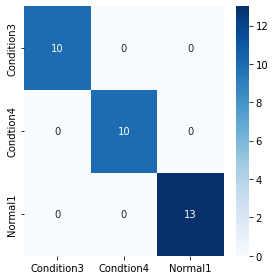

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        10
  Condition4       1.00      1.00      1.00        10
     Normal1       1.00      1.00      1.00        13

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



Fold Group  3


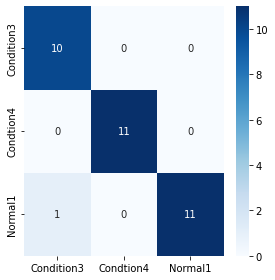

              precision    recall  f1-score   support

  Condition3       0.91      1.00      0.95        10
  Condition4       1.00      1.00      1.00        11
     Normal1       1.00      0.92      0.96        12

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



Fold Group  4


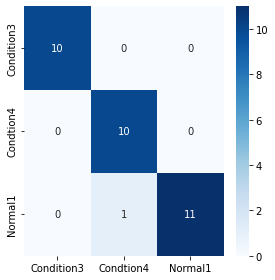

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        10
  Condition4       0.91      1.00      0.95        10
     Normal1       1.00      0.92      0.96        12

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



average C3 Accuracy =  0.946
average C4 Accuracy =  0.9773
average N1 Accuracy =  0.95
average Net Accuracy =  0.9543


([<matplotlib.axis.XTick at 0x25e9fb3aa00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

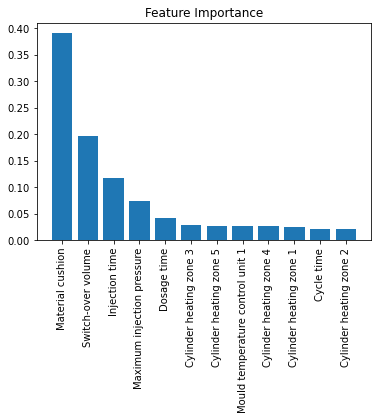

In [29]:
imp_Arr = model.feature_importances_
imp_DF = pd.DataFrame({'importance':imp_Arr}, index = X.columns)

imp_DF = imp_DF.sort_values(by = 'importance', ascending = False)

plt.title("Feature Importance")
plt.bar(imp_DF.index,imp_DF['importance'])
plt.xticks(imp_DF.index, rotation=90)

In [30]:
#reorder the feature dataset according to imp_DF then scale

Xreindex = X.reindex(columns = imp_DF.index)
Xs = pd.DataFrame(scale(Xreindex), columns = imp_DF.index)

Xs

,Material cushion,Switch-over volume,Injection time,Maximum injection pressure,Dosage time,Cylinder heating zone 3,Cylinder heating zone 5,Mould temperature control unit 1,Cylinder heating zone 4,Cylinder heating zone 1,Cycle time,Cylinder heating zone 2
0,0.118658,-0.233265,0.091673,-1.011889,0.957220,0.454362,0.175450,0.932801,0.659585,-1.056115,1.129518,0.513500
1,0.135134,-0.966144,0.091673,-1.970667,1.195266,-1.188875,-1.543344,0.684359,1.121690,-1.098903,1.460221,0.623775
2,-0.367024,-0.843998,0.091673,-1.568191,2.169088,-0.052838,-1.134671,-0.890325,-0.342393,0.444051,-0.409796,-1.249677
3,-0.148623,-0.050046,-0.917501,-0.288393,1.628075,-0.387912,0.321151,1.594096,-1.293652,-1.295986,-1.337667,-1.368434
4,-0.422035,0.011028,1.100847,0.627963,1.087063,0.022898,1.052024,1.546599,0.298918,1.368526,1.100968,0.672247
...,...,...,...,...,...,...,...,...,...,...,...,...
126,1.059993,0.992047,-0.513832,0.822963,-0.795660,-0.137754,1.111251,0.560138,0.634789,1.043080,0.589450,0.898855
127,0.534508,0.503461,0.495343,-0.492840,-0.016602,1.434338,-0.223746,-0.411709,0.412754,-0.217215,1.020077,0.066344
128,1.529274,2.152439,-0.513832,-0.646665,0.199803,-1.677715,0.776021,0.351885,0.189591,-1.403604,0.603725,0.449275
129,0.576785,0.686681,0.495343,-1.552327,1.281828,0.430265,0.535556,-0.042699,-0.707568,1.201265,0.353913,1.613820


In [31]:
number = 2

selectedFeatures = imp_DF.index[:number]

selectedFeatures

Index(['Material cushion', 'Switch-over volume'], dtype='object')

In [42]:
#this cell will prepare the datasets required for the feature reduced model and its visualisation in plot_decision_regions()


Xf = Xs[selectedFeatures]

encoder = preprocessing.LabelEncoder()

Ye = pd.DataFrame(encoder.fit_transform(Y.values.ravel()), columns = ['Condition'])

YeClass = ['0','1','2']

In [43]:
#building the visualisations for DT, RBF SVM and RF to get a better understanding, but with only 2 features



Fold Group  1


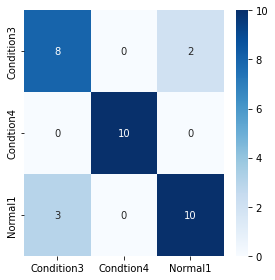

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       1.00      1.00      1.00        10
           2       0.83      0.77      0.80        13

    accuracy                           0.85        33
   macro avg       0.85      0.86      0.85        33
weighted avg       0.85      0.85      0.85        33



Fold Group  2


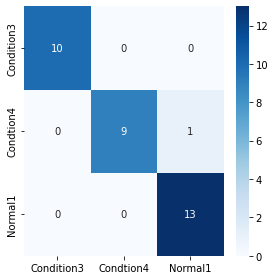

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.96        13

    accuracy                           0.97        33
   macro avg       0.98      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



Fold Group  3


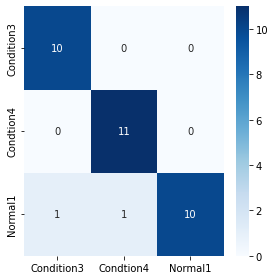

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.92      1.00      0.96        11
           2       1.00      0.83      0.91        12

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33



Fold Group  4


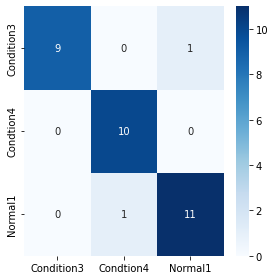

C:\Users\nicho\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please us

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10
           2       0.92      0.92      0.92        12

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



average C3 Accuracy =  0.9091
average C4 Accuracy =  0.9564
average N1 Accuracy =  0.9196
average Net Accuracy =  0.9238


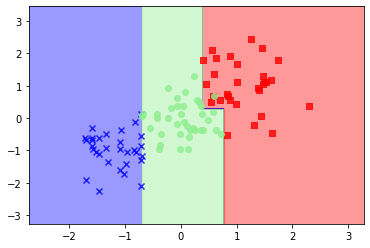

In [48]:
#Default DT
# Optimized tree
tempdepth = 4       #choose model parameters
templeaf = 3

model = dt(random_state = 0, max_depth = tempdepth, min_samples_leaf = templeaf)
n = 1

C3AL = []
C4AL = []
N1AL = []

NAL = []

for trainIndex, testIndex in cv.split(Xf, Ye):
    print('\n\nFold Group ', n)
    n += 1
    
    train_X = Xf.iloc[trainIndex]
    test_X = Xf.iloc[testIndex]
    train_Y = Ye.iloc[trainIndex]
    test_Y = Ye.iloc[testIndex]
    
    model.fit(train_X, train_Y.values.ravel())
    pred_Y = model.predict(test_X)
    
    CM = confusion_matrix(test_Y, pred_Y)
    
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)

    print(classification_report(test_Y,pred_Y))
    
    C3Acc = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
    C3AL.append(C3Acc)
    C4Acc = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
    C4AL.append(C4Acc)
    N1Acc = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
    N1AL.append(N1Acc)
    
    NetAcc = acs(test_Y,pred_Y)
    NAL.append(NetAcc)
    
plot_decision_regions(train_X.values, train_Y.values.ravel(), model)
    
print('\n')

print('average C3 Accuracy = ', np.mean(C3AL).round(4))
print('average C4 Accuracy = ' , np.mean(C4AL).round(4))
print('average N1 Accuracy = ', np.mean(N1AL).round(4))
print('average Net Accuracy = ', np.mean(NAL).round(4))



Fold Group  1


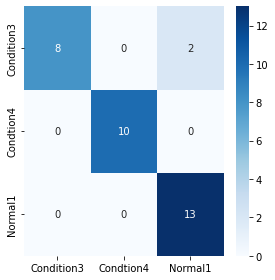

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       1.00      1.00      1.00        10
           2       0.87      1.00      0.93        13

    accuracy                           0.94        33
   macro avg       0.96      0.93      0.94        33
weighted avg       0.95      0.94      0.94        33



Fold Group  2


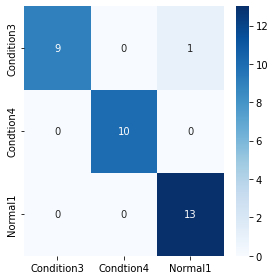

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00        10
           2       0.93      1.00      0.96        13

    accuracy                           0.97        33
   macro avg       0.98      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



Fold Group  3


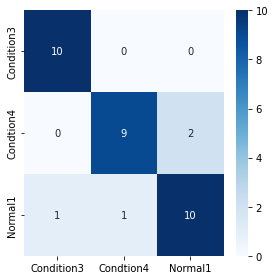

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.90      0.82      0.86        11
           2       0.83      0.83      0.83        12

    accuracy                           0.88        33
   macro avg       0.88      0.88      0.88        33
weighted avg       0.88      0.88      0.88        33



Fold Group  4


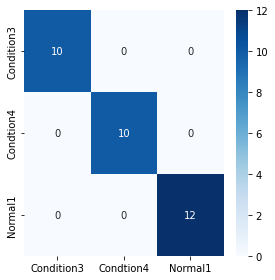

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        12

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



C:\Users\nicho\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keywo



average C3 Accuracy =  0.9773
average C4 Accuracy =  0.975
average N1 Accuracy =  0.9071
average Net Accuracy =  0.947


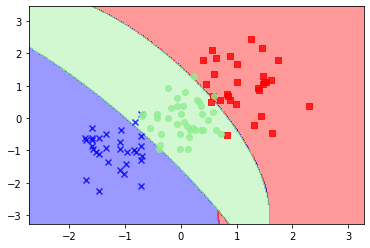

In [49]:
#Optmised rbf SVM

model = SVC(kernel='rbf', random_state=0,C =  1.73711,gamma =  0.0901)
n = 1

C3AL = []
C4AL = []
N1AL = []

NAL = []

for trainIndex, testIndex in cv.split(Xf, Ye):
    print('\n\nFold Group ', n)
    n += 1
    
    train_X = Xf.iloc[trainIndex]
    test_X = Xf.iloc[testIndex]
    train_Y = Ye.iloc[trainIndex]
    test_Y = Ye.iloc[testIndex]
    
    model.fit(train_X, train_Y.values.ravel())
    pred_Y = model.predict(test_X)
    
    CM = confusion_matrix(test_Y, pred_Y)
    
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)

    print(classification_report(test_Y,pred_Y))
    
    C3Acc = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
    C3AL.append(C3Acc)
    C4Acc = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
    C4AL.append(C4Acc)
    N1Acc = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
    N1AL.append(N1Acc)
    
    NetAcc = acs(test_Y,pred_Y)
    NAL.append(NetAcc)

plot_decision_regions(train_X.values, train_Y.values.ravel(), model)

print('\n')

print('average C3 Accuracy = ', np.mean(C3AL).round(4))
print('average C4 Accuracy = ' , np.mean(C4AL).round(4))
print('average N1 Accuracy = ', np.mean(N1AL).round(4))
print('average Net Accuracy = ', np.mean(NAL).round(4))



Fold Group  1


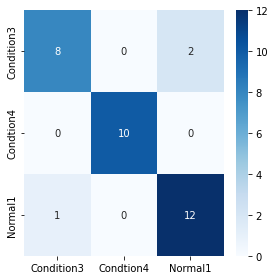

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       1.00      1.00      1.00        10
           2       0.86      0.92      0.89        13

    accuracy                           0.91        33
   macro avg       0.92      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33



Fold Group  2


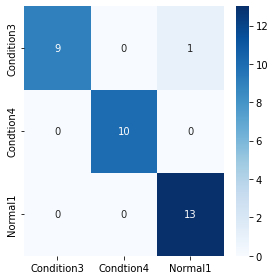

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00        10
           2       0.93      1.00      0.96        13

    accuracy                           0.97        33
   macro avg       0.98      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



Fold Group  3


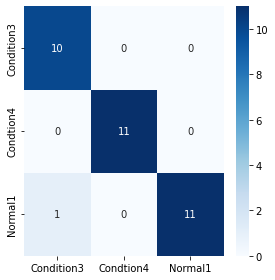

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      1.00      1.00        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



Fold Group  4


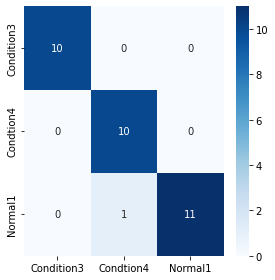

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        12

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



C:\Users\nicho\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please us



average C3 Accuracy =  0.9495
average C4 Accuracy =  0.9773
average N1 Accuracy =  0.9464
average Net Accuracy =  0.9543


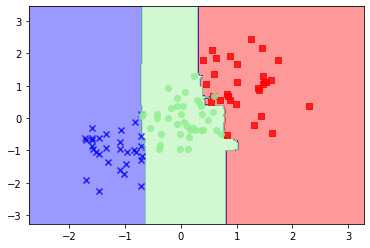

In [50]:
#Optimised RF

model = RandomForestClassifier(random_state=0,n_estimators =  117
,max_samples =  0.87)
n = 1

C3AL = []
C4AL = []
N1AL = []

NAL = []

for trainIndex, testIndex in cv.split(Xf, Ye):
    print('\n\nFold Group ', n)
    n += 1
    
    train_X = Xf.iloc[trainIndex]
    test_X = Xf.iloc[testIndex]
    train_Y = Ye.iloc[trainIndex]
    test_Y = Ye.iloc[testIndex]
    
    model.fit(train_X, train_Y.values.ravel())
    pred_Y = model.predict(test_X)
    
    CM = confusion_matrix(test_Y, pred_Y)
    
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)

    print(classification_report(test_Y,pred_Y))
    
    C3Acc = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
    C3AL.append(C3Acc)
    C4Acc = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
    C4AL.append(C4Acc)
    N1Acc = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
    N1AL.append(N1Acc)
    
    NetAcc = acs(test_Y,pred_Y)
    NAL.append(NetAcc)

plot_decision_regions(train_X.values, train_Y.values.ravel(), model)

print('\n')

print('average C3 Accuracy = ', np.mean(C3AL).round(4))
print('average C4 Accuracy = ' , np.mean(C4AL).round(4))
print('average N1 Accuracy = ', np.mean(N1AL).round(4))
print('average Net Accuracy = ', np.mean(NAL).round(4))